In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
total_df = pd.read_csv("../data/train.csv")
total_df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [3]:
total_df["item"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [4]:
total_df["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**This shows that there are 50 different items in 10 different stores ranging from item 1 to item 50**

## Preprocessing: Splitting the "date" column into useful information

In [13]:
total_df["year"] = total_df["date"].apply(lambda x: int(x.split("-")[0]))

In [15]:
total_df["month"] = total_df["date"].apply(lambda x: int(x.split("-")[1]))
total_df["day"] = total_df["date"].apply(lambda x: int(x.split("-")[2]))

In [16]:
total_df.head()

date  store  item  sales  year  month  day
0  2013-01-01      1     1     13  2013      1    1
1  2013-01-02      1     1     11  2013      1    2
2  2013-01-03      1     1     14  2013      1    3
3  2013-01-04      1     1     13  2013      1    4
4  2013-01-05      1     1     10  2013      1    5

In [5]:
store_1 = total_df[total_df["store"] == 1]

In [6]:
store_1

date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
896561  2017-12-27      1    50     38
896562  2017-12-28      1    50     52
896563  2017-12-29      1    50     59
896564  2017-12-30      1    50     66
896565  2017-12-31      1    50     45

[91300 rows x 4 columns]

In [7]:
store_1["store"].unique()

array([1])

In [8]:
store_1_item_1 = store_1[store_1["item"] == 1]

In [9]:
store_1_item_1.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

## Visualization: Plotting the sales value for (store_1, item_1) to check seasonality of data

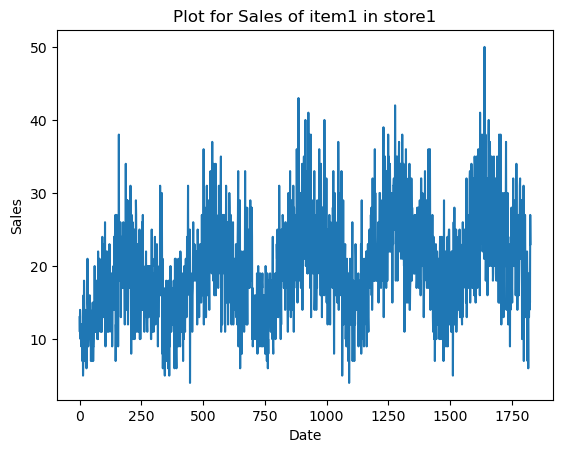

In [10]:
plt.plot(store_1_item_1["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Plot for Sales of item1 in store1")
plt.show()

### The plot indicates that the data is a time-series data as well as a periodic data. The fact that it is time-series, we can use ARIMA model and the seasonal property indicates that SARIMA model can be used

## Visualization: Box Plot for Sales Distribution

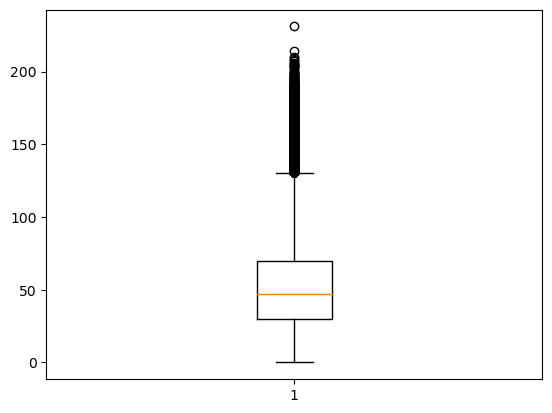

In [18]:
plt.boxplot(total_df["sales"])
plt.show()

Even though we see datapoints for sales data lying above the 1.5*IQR margin, these datapoints lead to the periodicity and flactuation in a time-series data